In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import datetime as dt
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [4]:
df_raw = yf.download(tickers= "^IBEX", start = "1999-01-01", end= "2024-10-01")

df_raw.index = pd.to_datetime(df_raw.index)
df = df_raw.copy()

# Agrupar por mes y tomar el último precio de cada mes
df = df.groupby(df.index.to_period("M")).first()
df.index = df.index.strftime('%Y-%m')


# Calcular el rendimiento mensual
df["HPY_IBEX"] = df["Close"].pct_change()
df = df.drop(columns=df.columns[:-1])
df.to_csv("resultado.csv", index=False)
df

[*********************100%***********************]  1 of 1 completed


,HPY_IBEX
Date,
1999-01,NaN
1999-02,-0.043033
1999-03,-0.015933
1999-04,0.017522
1999-05,0.007941
...,...
2024-05,-0.009439
2024-06,0.048308
2024-07,-0.029849


In [3]:
df2_raw.reset_index()
df2_raw = pd.read_csv("Proyectos y prácticas/Tarea.csv", header = 0, sep=';')
df2_raw['Date'] = pd.to_datetime(df2_raw['Date'])
df2_raw = df2_raw.set_index("Date")
df2 = df2_raw.copy().dropna()
df2.index = df2.index.strftime('%Y-%m')
df2

NameError: name 'df2_raw' is not defined

In [ ]:
data = pd.concat([df, df2], axis= 1).dropna()
data

,HPY_IBEX,Euribor a un año (mensual)
Date,,
1999-02,-0.043033,0.03030
1999-03,-0.015933,0.03046
1999-04,0.017522,0.02756
1999-05,0.007941,0.02683
1999-06,-0.003359,0.02836
...,...,...
2024-05,-0.009439,0.03680
2024-06,0.048308,0.03650
2024-07,-0.029849,0.03526


## EDA

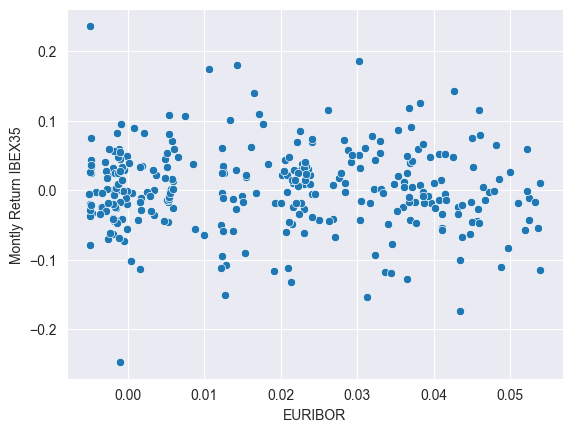

In [ ]:
sns.set_style(style="darkgrid")
sns.scatterplot(y = data["HPY_IBEX"], x= data["Euribor a un año (mensual)"])
plt.xlabel("EURIBOR")
plt.ylabel("Montly Return IBEX35")
plt.show()

In [ ]:
x = sm.add_constant(data["Euribor a un año (mensual)"])

model = sm.OLS(endog = data["HPY_IBEX"], exog= x).fit()
alpha, beta = model.params # de momento no es importante el alpha, puede ver: 
#https://www.acsu.buffalo.edu/~keechung/Collection%20of%20Papers%20for%20courses/Behavioral%20Finance%20and%20Sources%20of%20Alpha.pdf

print(f"Beta de {data.columns[1]}: {round(beta, 4)} \nAlpha de {data.columns[1]}: {round(alpha, 4)}")
print(f"IBEX35 = {round(beta, 4)} * EURIBOR + {round(alpha, 4)}")
model.summary() # El regresor (SP500) da p-value de 0.000 por lo que se da como signficativo de igual forma el F-statistic

Beta de Euribor a un año (mensual): -0.144 
Alpha de Euribor a un año (mensual): 0.0047
IBEX35 = -0.144 * EURIBOR + 0.0047


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               HPY_IBEX   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5737
Date:                Thu, 21 Nov 2024   Prob (F-statistic):              0.449
Time:                        16:37:22   Log-Likelihood:                 436.13
No. Observations:                 308   AIC:                            -868.3
Df Residuals:                     306   BIC:                            -860.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0047      0.005      0.964      0.336      -0.005       0.014
Euribor a un año (mensual)    -0.1440      0.190     -0.757      0.449      -0.518       0.230
==============================================================================
Omnibus:                       17.571   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.466
Skew:                          -0.008   Prob(JB):                     1.10e-11
Kurtosis:                       4.983   Cond. No.                         56.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""